In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_json("exps.jsonl", lines=True)
df = df[df["params.dataset.path"] == "bdsaglam/drop-musique-mini"].copy()
print(len(df))
df.head()

14


,commit,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.top_p,params.qa.system_prompt,...,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique,params.qa.instruction
0,c32ca6dbb6474e5546c303462d586427f3672323,c32ca6dbb6474e5546c303462d586427f3672323,main,bdsaglam/drop-musique-mini,default,train,llama-3-8b,0.0,0.9990,direct/format-few.txt,...,35,8.457143,5.917784,3,5.0,6,9.00,28,DIRECT,direct/format-few:cq:manual/direct
1,workspace,workspace,None,bdsaglam/drop-musique-mini,default,train,llama-3-8b,0.0,0.9999,direct/format-few.txt,...,35,8.457143,5.917784,3,5.0,6,9.00,28,DIRECT,direct/format-few:cq:manual/direct
2,ef6fb76896f7144e8b2450953e6096000221940d,e44b68f858451df3b29f77987bd3e502732c7a7d,idled-site,bdsaglam/drop-musique-mini,default,train,llama-3.3-70b,0.0,0.9990,direct/format-few-drop.txt,...,33,6.090909,5.832900,1,3.0,4,7.00,32,DIRECT,direct/format-few-drop:cq:drop/direct
3,ef6fb76896f7144e8b2450953e6096000221940d,5a563d86a7065f96759f6784dca4298626801a46,fated-fuss,bdsaglam/drop-musique-mini,default,train,llama-3.3-70b,0.0,0.9990,ccot/format-thought-drop.txt,...,22,65.454545,54.838054,22,28.0,42,83.25,210,CCOT,ccot/format-thought-drop:cq:drop/ccot
4,ef6fb76896f7144e8b2450953e6096000221940d,b1968b921ffb6b8b8b50657b9c8af4f0d7177a0a,chewy-choc,bdsaglam/drop-musique-mini,default,train,llama-3.3-70b,0.0,0.9990,direct/format-few-drop.txt,...,33,6.121212,5.818922,1,3.0,4,7.00,32,DIRECT,direct/format-few-drop:cq:drop/direct


In [3]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = ['metrics.exact_match', 'metrics.f1']
df.drop(
    columns=[
        "id",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
    ],
    inplace=True,
)

In [14]:
target_param_cols = [
    "params.qa.model",
    "params.qa.temperature",
    "params.qa.top_p",
    "params.qa.technique",
    "params.qa.instruction",
    "params.qa.n_shot",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,commit,name,params.qa.model,params.qa.temperature,params.qa.top_p,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,...,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique,params.qa.instruction
0,c32ca6dbb6474e5546c303462d586427f3672323,main,llama-3-8b,0.0,0.9990,direct/format-few.txt,cq.txt,manual/direct.json,0,1,...,35,8.457143,5.917784,3,5.0,6,9.00,28,DIRECT,direct/format-few:cq:manual/direct
1,workspace,None,llama-3-8b,0.0,0.9999,direct/format-few.txt,cq.txt,manual/direct.json,0,1,...,35,8.457143,5.917784,3,5.0,6,9.00,28,DIRECT,direct/format-few:cq:manual/direct
2,ef6fb76896f7144e8b2450953e6096000221940d,quack-conk,llama-3.3-70b,0.0,0.9990,ccot/format-thought-drop.txt,cq.txt,drop/ccot.json,0,1,...,23,70.086957,81.579249,22,27.5,36,77.50,390,CCOT,ccot/format-thought-drop:cq:drop/ccot
3,ef6fb76896f7144e8b2450953e6096000221940d,fated-fuss,llama-3.3-70b,0.0,0.9990,ccot/format-thought-drop.txt,cq.txt,drop/ccot.json,0,1,...,22,65.454545,54.838054,22,28.0,42,83.25,210,CCOT,ccot/format-thought-drop:cq:drop/ccot
4,ef6fb76896f7144e8b2450953e6096000221940d,bifid-tint,llama-3.3-70b,0.0,0.9990,ccot/format-thought-drop.txt,cq.txt,drop/ccot.json,0,1,...,23,65.347826,54.227307,22,27.5,42,79.50,210,CCOT,ccot/format-thought-drop:cq:drop/ccot


In [15]:
avg_df = (
    df.groupby(target_param_cols)[["name", *metric_cols]]
    .agg({"name": tuple, "metrics.exact_match": "mean", "metrics.f1": "mean"})
    .reset_index()
)
# find the rows with max f1 score for each technique group
max_f1_rows = avg_df.groupby("params.qa.technique")["metrics.f1"].idxmax()
best_df = avg_df.loc[
    max_f1_rows, ["name"] + target_param_cols + metric_cols[:2]
].sort_values("metrics.f1", ascending=False)
best_df

,name,params.qa.model,params.qa.temperature,params.qa.top_p,params.qa.technique,params.qa.instruction,params.qa.n_shot,metrics.exact_match,metrics.f1
2,"(quack-conk, fated-fuss, bifid-tint)",llama-3.3-70b,0.0,0.999,CCOT,ccot/format-thought-drop:cq:drop/ccot,0,0.643333,0.749648
5,"(cronk-doit, inert-pein, outer-veer)",llama-3.3-70b,0.5,0.950,DIRECT,direct/format-few-drop:cq:drop/direct,0,0.436667,0.642393


In [16]:
for model in avg_df['params.qa.model'].unique():
    _df = avg_df[avg_df['params.qa.model'] == model].sort_values("metrics.f1", ascending=False)
    print('-'*120)
    display(_df)

------------------------------------------------------------------------------------------------------------------------


,params.qa.model,params.qa.temperature,params.qa.top_p,params.qa.technique,params.qa.instruction,params.qa.n_shot,name,metrics.exact_match,metrics.f1
0,llama-3-8b,0.0,0.9990,DIRECT,direct/format-few:cq:manual/direct,0,"(main,)",0.37,0.599337
1,llama-3-8b,0.0,0.9999,DIRECT,direct/format-few:cq:manual/direct,0,"(None,)",0.37,0.599337


------------------------------------------------------------------------------------------------------------------------


,params.qa.model,params.qa.temperature,params.qa.top_p,params.qa.technique,params.qa.instruction,params.qa.n_shot,name,metrics.exact_match,metrics.f1
2,llama-3.3-70b,0.0,0.999,CCOT,ccot/format-thought-drop:cq:drop/ccot,0,"(quack-conk, fated-fuss, bifid-tint)",0.643333,0.749648
4,llama-3.3-70b,0.5,0.950,CCOT,ccot/format-thought-drop:cq:drop/ccot,0,"(tuned-toff, power-shay, balky-mine)",0.643333,0.745186
5,llama-3.3-70b,0.5,0.950,DIRECT,direct/format-few-drop:cq:drop/direct,0,"(cronk-doit, inert-pein, outer-veer)",0.436667,0.642393
3,llama-3.3-70b,0.0,0.999,DIRECT,direct/format-few-drop:cq:drop/direct,0,"(chewy-choc, stony-bunt, idled-site)",0.423333,0.637231


In [7]:
zs_avg_df = avg_df[avg_df['params.qa.n_shot'] == 0]
zs_max_f1_rows = zs_avg_df.groupby(["params.qa.technique", "params.qa.model"])["metrics.f1"].idxmax()
zs_best_df = zs_avg_df.loc[
    zs_max_f1_rows, ["name"] + target_param_cols + metric_cols[:2]
].sort_values("metrics.f1", ascending=False)
zs_best_df

,name,params.qa.model,params.qa.temperature,params.qa.technique,params.qa.instruction,params.qa.n_shot,metrics.exact_match,metrics.f1
1,"(quack-conk, fated-fuss, bifid-tint)",llama-3.3-70b,0.0,CCOT,ccot/format-thought-drop:cq:drop/ccot,0,0.643333,0.749648
4,"(cronk-doit, inert-pein, outer-veer)",llama-3.3-70b,0.5,DIRECT,direct/format-few-drop:cq:drop/direct,0,0.436667,0.642393
0,"(main, None)",llama-3-8b,0.0,DIRECT,direct/format-few:cq:manual/direct,0,0.370000,0.599337


In [8]:
fs_avg_df = avg_df[avg_df['params.qa.n_shot'] == 1]
fs_max_f1_rows = fs_avg_df.groupby("params.qa.technique")["metrics.f1"].idxmax()
fs_best_df = fs_avg_df.loc[
    fs_max_f1_rows, ["name"] + target_param_cols + metric_cols[:2]
].sort_values("metrics.f1", ascending=False)
fs_best_df

,name,params.qa.model,params.qa.temperature,params.qa.technique,params.qa.instruction,params.qa.n_shot,metrics.exact_match,metrics.f1


In [9]:
avg_df[avg_df["params.qa.model"] == "deepseek-r1-llama-70b-tgi"].sort_values("metrics.f1", ascending=False).drop(columns=['params.qa.technique', 'name'])

,params.qa.model,params.qa.temperature,params.qa.instruction,params.qa.n_shot,metrics.exact_match,metrics.f1


In [10]:
def plot_heatmap(df, metric_col):
    instructions = df["params.qa.instruction"].unique()
    n = len(instructions)
    n_cols = 2
    n_rows = (n + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))

    vmin = df[metric_col].min()
    vmax = df[metric_col].max()

    for ax, instruction in zip(axes.flatten(), instructions):
        subset_df = df[df["params.qa.instruction"] == instruction]
        pivot_table = subset_df.pivot_table(
            values=metric_col,
            index="params.qa.temperature",
            columns="params.qa.n_shot",
            aggfunc="mean",
        )
        sns.heatmap(
            pivot_table,
            annot=True,
            fmt=".3f",
            cmap="YlGnBu",
            ax=ax,
            yticklabels=True,
            vmin=vmin,
            vmax=vmax
        )
        ax.set_title(instruction)
        ax.set_xlabel("Number of Few-Shot Examples")
        ax.set_ylabel("Temperature")
        ax.invert_yaxis()

    # Remove any empty subplots
    for ax in axes.flatten()[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.2)  # Add padding between plots

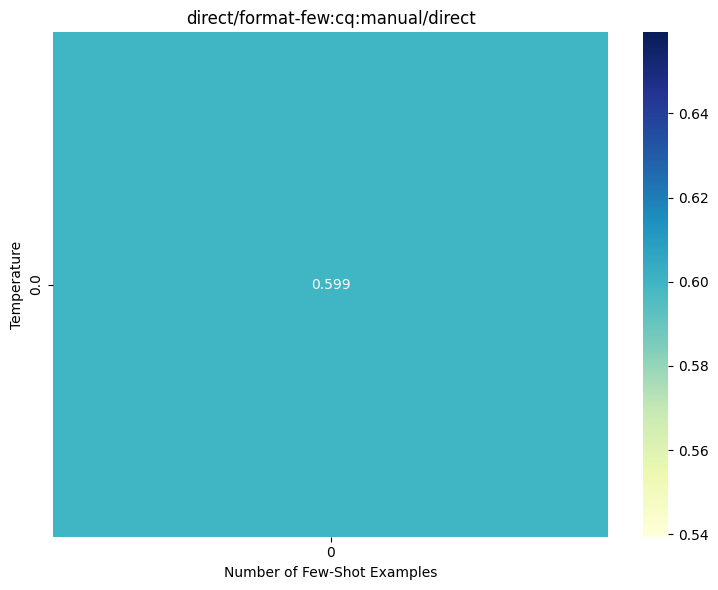

In [11]:
model = 'llama-3-8b'
plot_heatmap(df[df["params.qa.model"] == model], "metrics.f1")

In [12]:
def compare_grid(df):
    models = df["params.qa.model"].unique()
    instructions = df["params.qa.instruction"].unique()
    n = len(models)
    n_cols = 2
    n_rows = (n + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))

    # Define a more distinct color palette and map each instruction to a specific color
    palette = sns.color_palette("colorblind", len(instructions))
    instruction_colors = dict(zip(instructions, palette))

    for ax, model in zip(axes.flatten(), models):
        subset_df = df[df["params.qa.model"] == model]
        pivot_table = subset_df.pivot_table(
            values="metrics.f1",
            index="params.qa.temperature",
            columns="params.qa.instruction",
            aggfunc="mean",
        )
        pivot_table.plot(
            title=f"{model}",
            xlabel="Temperature",
            ylabel="F1 Score",
            style="o-",
            ax=ax,
            color=[instruction_colors[instruction] for instruction in pivot_table.columns]
        )
        ax.set_ylim(0, 1)  # Set y-axis limits

    # Remove any empty subplots
    for ax in axes.flatten()[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.4)  # Add padding between plots
    plt.show()


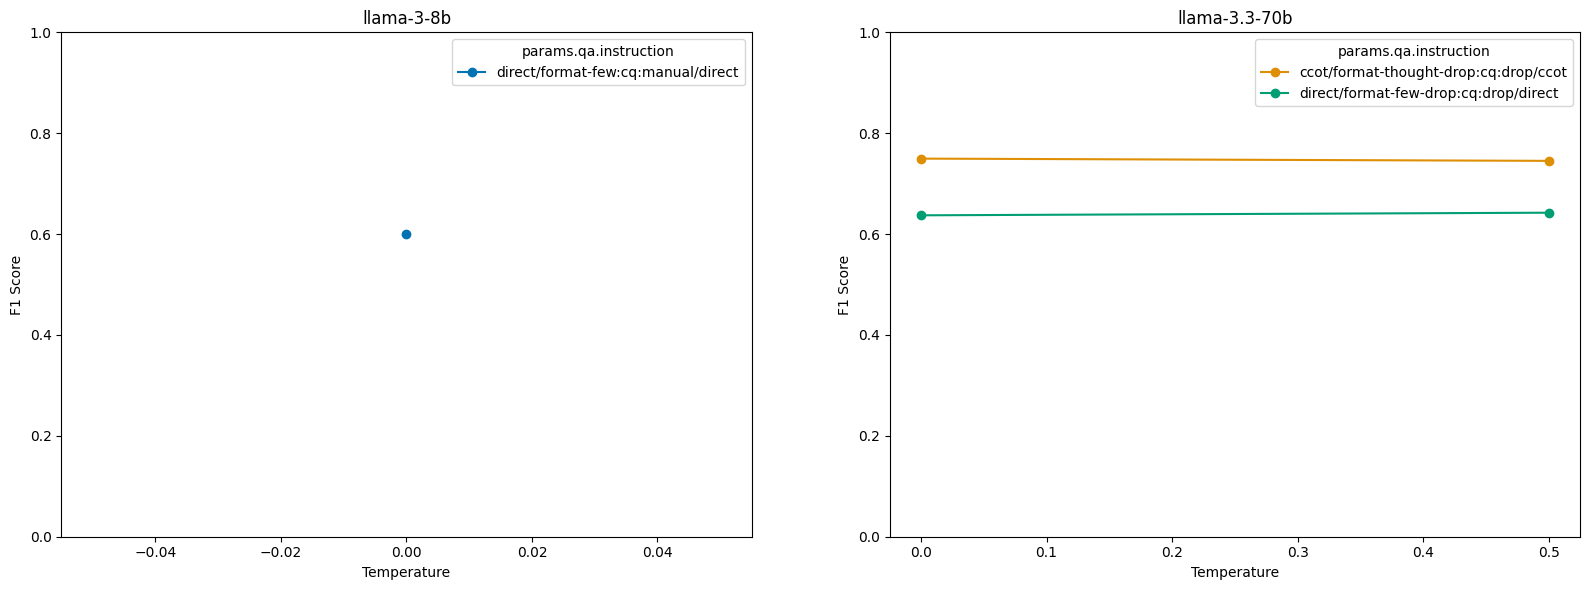

In [13]:
compare_grid(df)